# Mastering Market Dynamics: Identifying Regimes with Hidden Markov Models


Understanding the underlying market regimes is crucial for investors and traders alike. Market regimes are periods during which the market behaves in a certain consistent manner, such as bullish, bearish, or sideways movements. Identifying these regimes can provide valuable insights into market trends and help in making informed investment decisions.



Hidden Markov Models (HMMs) offer a powerful statistical approach to model dynamic systems where the states are not directly observable, hence ‘hidden’.

In [1]:
!pip install yfinance
!pip install numpy
!pip install matplotlib
!pip install hmmlearn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 587.6 kB/s eta 0:00:00 kB/s eta 0:00:01:01


In [3]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm


In [4]:
# Define the ticker symbols
tickers = ['SBIN.NS', 'AGI.NS', 'RVNL.NS', 'PCBL.NS', 'HDFCBANK.NS']

# Download historical data for each ticker
data = {}
for ticker in tickers:
    data[ticker] = yf.download(ticker, start='2020-01-01', end='2024-01-30')

# Display the first few rows of JPM data
print(data['SBIN.NS'].head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-01  334.700012  335.950012  332.149994  334.450012  320.078247   
2020-01-02  334.500000  339.850006  333.350006  339.299988  324.719818   
2020-01-03  337.950012  337.950012  332.000000  333.700012  319.360474   
2020-01-06  331.700012  331.700012  317.700012  319.000000  305.292145   
2020-01-07  324.450012  327.000000  315.399994  318.399994  304.717926   

              Volume  
Date                  
2020-01-01  17379320  
2020-01-02  20324236  
2020-01-03  21853208  
2020-01-06  35645325  
2020-01-07  50966826  


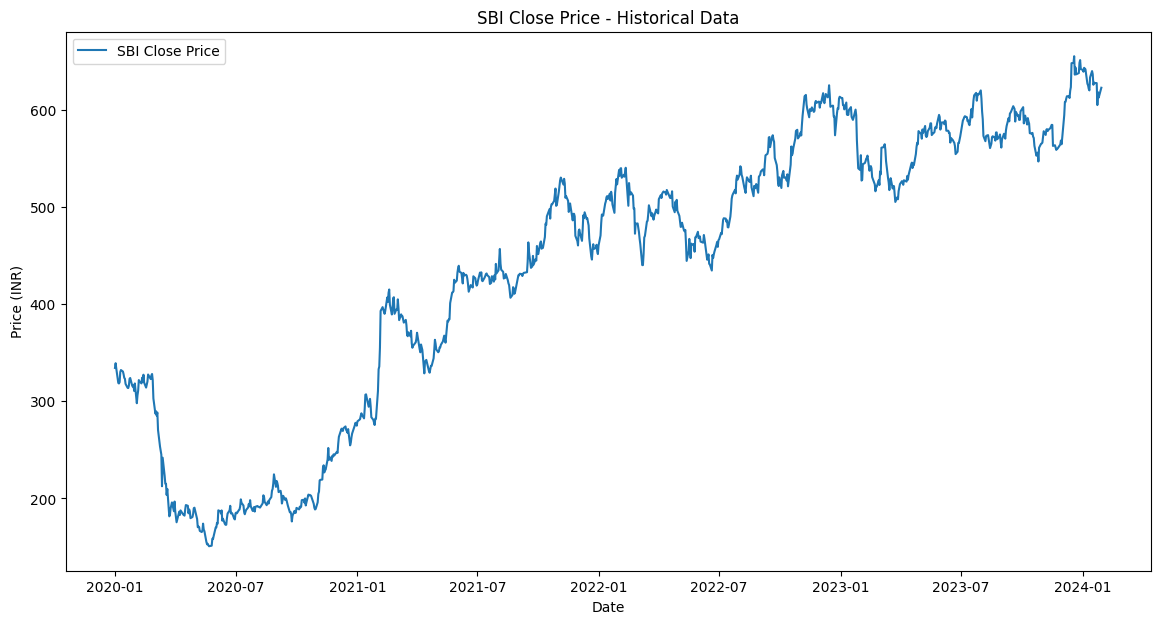

In [7]:
plt.figure(figsize=(14, 7))
plt.plot(data['SBIN.NS']['Close'], label='SBI Close Price')
plt.title('SBI Close Price - Historical Data')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()

### Building the Hidden Markov Model

In [10]:
class MarketRegimeHMM:
    def __init__(self, n_components=2):
        self.model = hmm.GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=1000)
        self.n_components = n_components
        
    def fit(self, data):
        returns = np.column_stack([data.pct_change().dropna().values])
        self.model.fit(returns)
        
    def predict(self, data):
        returns = np.column_stack([data.pct_change().dropna().values])
        return self.model.predict(returns)

# Instantiate and fit the model to JPM's closing prices
jpm_hmm = MarketRegimeHMM()
jpm_hmm.fit(data['SBIN.NS']['Close'])

# Predict the hidden states (market regimes)
jpm_states = jpm_hmm.predict(data['SBIN.NS']['Close'])

**Analyzing Market Regimes**

With the HMM fitted, we can analyze the inferred market regimes. Let’s visualize these regimes on a plot of JPM’s closing prices.

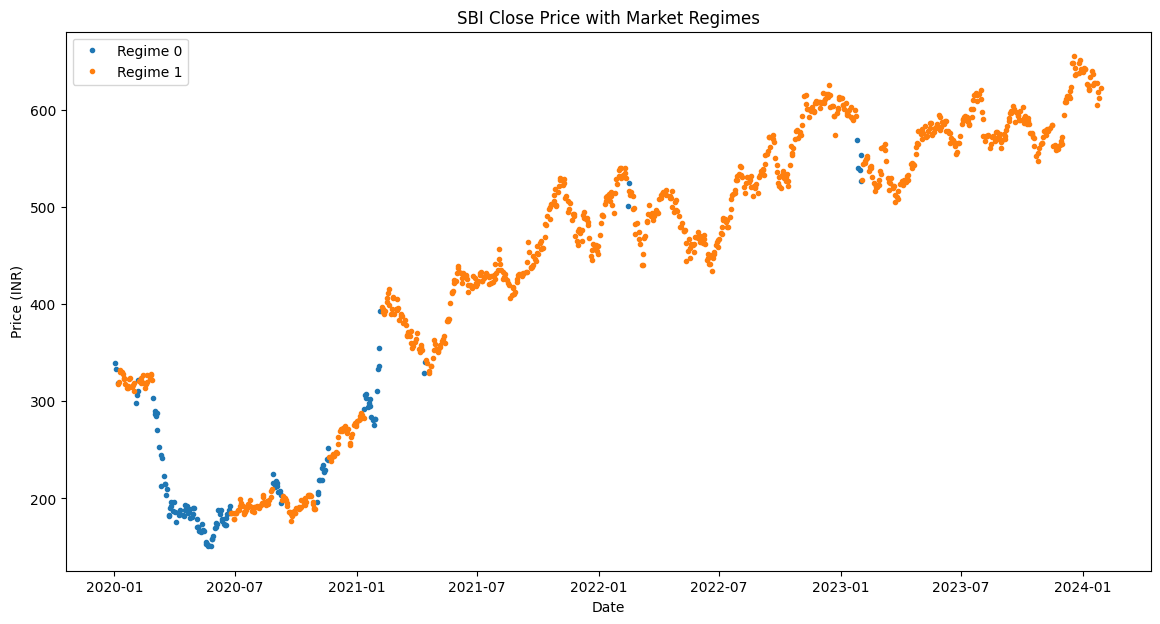

In [11]:
plt.figure(figsize=(14, 7))
for i in range(jpm_hmm.n_components):
    state = (jpm_states == i)
    plt.plot(data['SBIN.NS'].index[1:][state], data['SBIN.NS']['Close'][1:][state], '.', label=f'Regime {i}')
plt.title('SBI Close Price with Market Regimes')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()

**Refining the Model**

To refine our model, we can experiment with different numbers of components or tweak the model parameters. For instance, we might try increasing the number of components to see if we can capture more nuanced market behaviors.

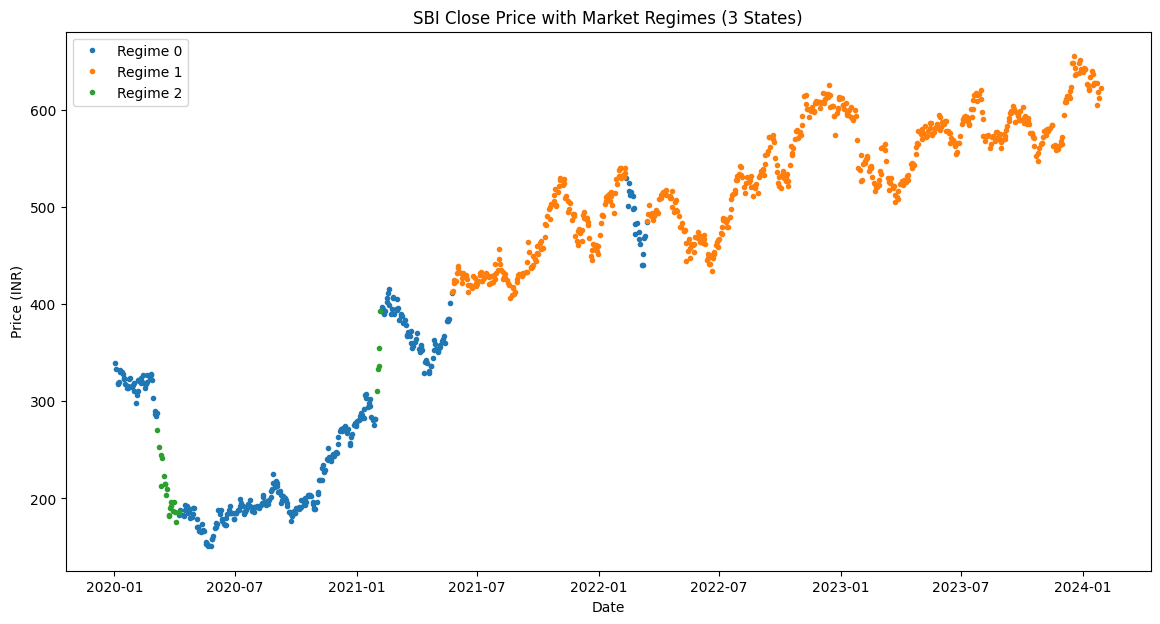

In [12]:
# Try a model with three hidden states
jpm_hmm_3 = MarketRegimeHMM(n_components=3)
jpm_hmm_3.fit(data['SBIN.NS']['Close'])
jpm_states_3 = jpm_hmm_3.predict(data['SBIN.NS']['Close'])

# Plot the results
plt.figure(figsize=(14, 7))
for i in range(jpm_hmm_3.n_components):
    state = (jpm_states_3 == i)
    plt.plot(data['SBIN.NS'].index[1:][state], data['SBIN.NS']['Close'][1:][state], '.', label=f'Regime {i}')
plt.title('SBI Close Price with Market Regimes (3 States)')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()

**Applying the Model to Other Assets**
    
Let’s apply our HMM to the other financial assets we downloaded earlier. We’ll create a function to streamline this process.

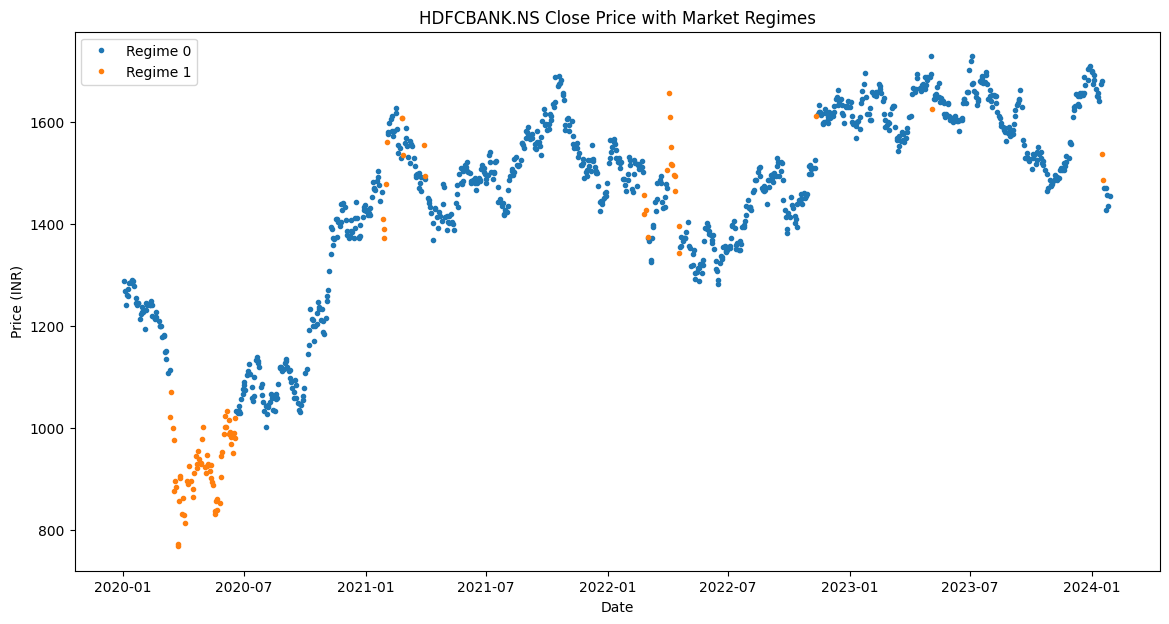

In [14]:
def analyze_asset(ticker, n_components=2):
    hmm_model = MarketRegimeHMM(n_components=n_components)
    hmm_model.fit(data[ticker]['Close'])
    states = hmm_model.predict(data[ticker]['Close'])
    
    plt.figure(figsize=(14, 7))
    for i in range(hmm_model.n_components):
        state = (states == i)
        plt.plot(data[ticker].index[1:][state], data[ticker]['Close'][1:][state], '.', label=f'Regime {i}')
    plt.title(f'{ticker} Close Price with Market Regimes')
    plt.xlabel('Date')
    plt.ylabel('Price (INR)')
    plt.legend()
    

# Analyze Goldman Sachs Group Inc. (GS)
analyze_asset('HDFCBANK.NS')